In [6]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import multiprocessing
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from os import listdir
from tqdm.auto import tqdm
tqdm.pandas()

### Separa conteúdo textual do resto do arquivo estruturado:

In [28]:
caminho = "dados/raw_data/"

corpus = open("dados/corpus_txt/corpus_txt.txt", mode="a+",encoding="utf-8")
for arquivo in tqdm(listdir(caminho)):
    dados = pd.read_csv(caminho + arquivo, usecols=['T'])
    for i, dado in enumerate(dados.values):
            corpus.writelines(dados.values[i][0])
            corpus.writelines("\n")
corpus.close()

In [7]:
corpus = "dados/corpus_txt/corpus_txt.txt"
model = Word2Vec(LineSentence(corpus), size=100, window=5,
                 
                 min_count=1, sg=1, hs=1, iter=10, workers=multiprocessing.cpu_count())

In [8]:
print(model)

Word2Vec(vocab=74252, size=100, alpha=0.025)


In [9]:
words = list(model.wv.vocab)
model.save("word2vec_stemming.model")

In [68]:
l = ['cidada', 'prova', 'evidencia', 'julg', 'homolog', 'decid', 'hom', 'mulh', 'acus']
dic = {k:model.wv.vocab[k] for k in set(model.wv.vocab).intersection(l)}
dic

{'mulh': <gensim.models.keyedvectors.Vocab at 0x2dc529eb348>,
 'julg': <gensim.models.keyedvectors.Vocab at 0x2dc52898cc8>,
 'decid': <gensim.models.keyedvectors.Vocab at 0x2dc529225c8>,
 'acus': <gensim.models.keyedvectors.Vocab at 0x2dc529222c8>,
 'cidada': <gensim.models.keyedvectors.Vocab at 0x2dc52939ec8>,
 'hom': <gensim.models.keyedvectors.Vocab at 0x2dc529eb488>,
 'prova': <gensim.models.keyedvectors.Vocab at 0x2dc52852388>,
 'homolog': <gensim.models.keyedvectors.Vocab at 0x2dc52894848>,
 'evidencia': <gensim.models.keyedvectors.Vocab at 0x2dc5301bdc8>}

In [69]:
X = model[dic]
X

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[-2.60003924e-01, -2.98908979e-01, -1.79425374e-01,
        -2.78656036e-01,  8.42788219e-02,  1.72130540e-01,
        -3.43813419e-01, -1.09010555e-01,  1.75609048e-02,
         8.33742559e-01, -2.66445249e-01, -8.42128601e-03,
         1.74767032e-01,  4.07010794e-01, -4.41007733e-01,
         6.40245080e-01, -4.71416712e-02, -6.87626079e-02,
        -1.45120472e-01, -2.11284682e-01, -7.07493842e-01,
         6.02100432e-01, -2.53073182e-02,  5.50550409e-02,
        -1.05789833e-01,  3.48939419e-01, -3.40175629e-01,
        -2.68245131e-01, -1.40233144e-01, -3.13267589e-01,
         1.85906902e-01,  3.84822428e-01, -4.62318987e-01,
        -2.65910089e-01, -2.77093146e-02,  1.72204092e-01,
         1.73933119e-01, -7.25694358e-01, -3.72990757e-01,
        -2.66311020e-01,  5.43234944e-01, -5.77212334e-01,
        -7.71694541e-01, -4.37489748e-01, -8.25894773e-02,
        -4.38822210e-01, -2.59425938e-01,  4.07148987e-01,
        -3.70468378e-01,  4.01631206e-01,  1.29016593e-0

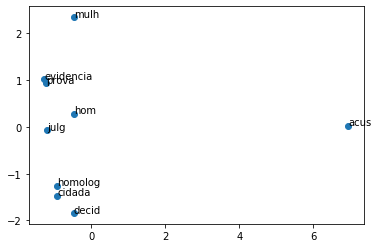

In [70]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(l):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [18]:
model.wv.most_similar(positive=['juiz', 'hom'], negative=['julg'], topn=1)

[('cidada', 0.46550628542900085)]

In [57]:
model.wv.similar_by_word('homolog', topn=20, restrict_vocab=None)

[('br', 0.6438158750534058),
 ('produz', 0.6436952948570251),
 ('gov', 0.6112778782844543),
 ('efeit', 0.6020599603652954),
 ('surt', 0.6015852093696594),
 ('desistenc', 0.5660452246665955),
 ('transaca', 0.5197044014930725),
 ('transa', 0.5108782649040222),
 ('www', 0.49094200134277344),
 ('renunc', 0.4873109459877014),
 ('galin', 0.4806278944015503),
 ('homologaca', 0.46710607409477234),
 ('consum', 0.4648081064224243),
 ('legal', 0.45830559730529785),
 ('zit', 0.45110487937927246),
 ('polastr', 0.4492359757423401),
 ('autor/exequ', 0.4474542737007141),
 ('kes', 0.44032472372055054),
 ('salvaran', 0.4353826642036438),
 ('restain', 0.43337929248809814)]